In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
    pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [22]:
import keras_tuner

In [23]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [25]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

In [26]:
print("--- MODEL COMPARISON ---")

## A. Simple Neural Network (ANN)
print("\nTraining Simple Neural Network...")
ann = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann_history = ann.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=0) # verbose=0 to keep output clean

--- MODEL COMPARISON ---

Training Simple Neural Network...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
print("Training Convolutional Neural Network...")
cnn = models.Sequential([
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn_history = cnn.fit(X_train_cnn, y_train, epochs=10, validation_split=0.2, verbose=0)

Training Convolutional Neural Network...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Evaluation Reports ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

Simple Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.95      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.95      0.96       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000


Convolutional Neural Network Classification Report:
              precision    recal

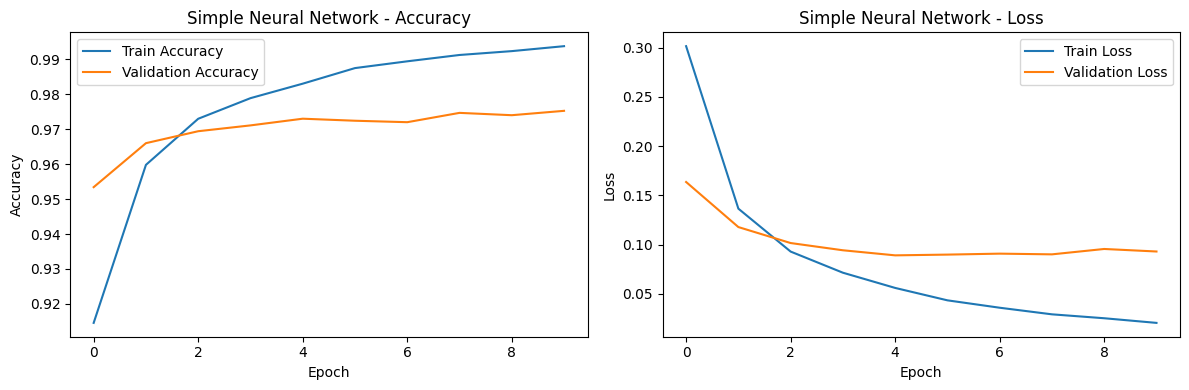

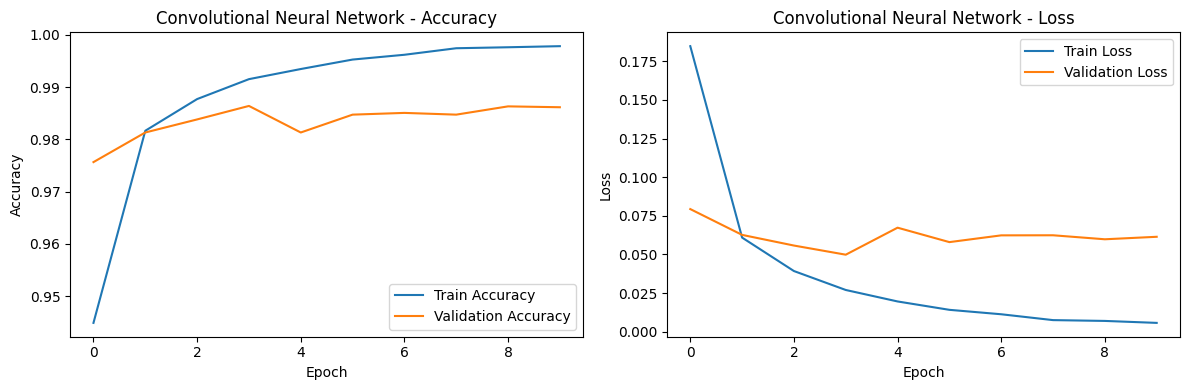

In [28]:
print("\n--- Evaluation Reports ---")
# Predictions
y_pred_ann = np.argmax(ann.predict(X_test), axis=1)
y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis=1)

print("\nSimple Neural Network Classification Report:")
print(classification_report(y_test, y_pred_ann))

print("\nConvolutional Neural Network Classification Report:")
print(classification_report(y_test, y_pred_cnn))

# Plotting function for training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

print("\n--- Training History Visualizations ---")
plot_history(ann_history, "Simple Neural Network")
plot_history(cnn_history, "Convolutional Neural Network")

In [29]:
print("\n\n--- PERFORMANCE IMPROVEMENT ---")

## A. Data Augmentation
print("\nTraining CNN with Data Augmentation...")
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,      # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    zoom_range=0.1          # Randomly zoom image
)



--- PERFORMANCE IMPROVEMENT ---

Training CNN with Data Augmentation...


In [30]:
cnn_augmented = models.Sequential([
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
cnn_augmented.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
cnn_augmented.fit(data_generator.flow(X_train_cnn, y_train, batch_size=32),
                  epochs=10,
                  validation_data=(X_test_cnn, y_test),
                  verbose=0)

loss, accuracy = cnn_augmented.evaluate(X_test_cnn, y_test)
print(f"CNN with Data Augmentation Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9768 - loss: 0.0689
CNN with Data Augmentation Test Accuracy: 0.9790


In [37]:
print("\nPerforming Hyperparameter Tuning...")

def build_model(hp):
    model = models.Sequential()
    # Tune the number of filters in the Conv2D layer
    hp_filters = hp.Int('filters', min_value=32, max_value=128, step=32)
    model.add(layers.Conv2D(filters=hp_filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    model.add(layers.Dense(units=hp_units, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5, # Number of hyperparameter combinations to test
    executions_per_trial=1, # Number of models to train per trial
    directory='my_dir',
    project_name='mnist_tuning'
)

# Create a smaller validation set for faster tuning
X_train_small, y_train_small = X_train_cnn[:10000], y_train[:10000]
X_val_small, y_val_small = X_train_cnn[10000:12000], y_train[10000:12000]

tuner.search(X_train_small, y_train_small, epochs=5, validation_data=(X_val_small, y_val_small))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of filters is {best_hps.get('filters')},
the optimal number of units in the dense layer is {best_hps.get('units')},
and the optimal learning rate is {best_hps.get('learning_rate')}.
""")

# Build and train the final model with the best hyperparameters
tuned_model = tuner.get_best_models(num_models=1)[0]

# It's good practice to retrain the best model on the full training data
tuned_model.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_test_cnn, y_test), verbose=0)
loss, accuracy = tuned_model.evaluate(X_test_cnn, y_test)
print(f"\nTuned CNN Test Accuracy: {accuracy:.4f}")


Performing Hyperparameter Tuning...
Reloading Tuner from my_dir/mnist_tuning/tuner0.json

The hyperparameter search is complete. The optimal number of filters is 96,
the optimal number of units in the dense layer is 128,
and the optimal learning rate is 0.001.



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9834 - loss: 0.0868

Tuned CNN Test Accuracy: 0.9880




--- MODEL INTERPRETATION (using the best tuned model) ---

Generating Confusion Matrix...
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


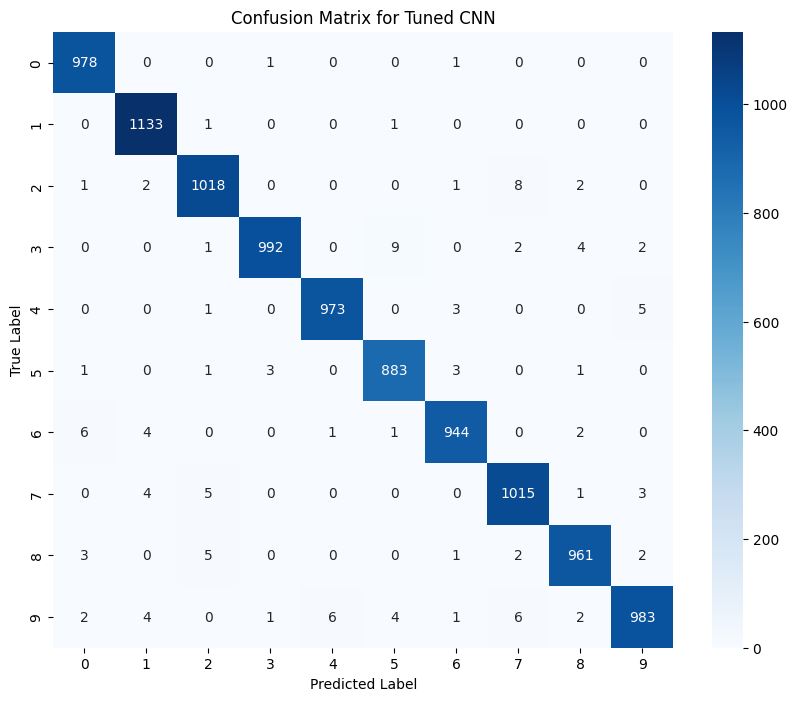

In [38]:
print("\n\n--- MODEL INTERPRETATION (using the best tuned model) ---")

## A. Confusion Matrix
print("\nGenerating Confusion Matrix...")
y_pred_tuned = np.argmax(tuned_model.predict(X_test_cnn), axis=1)
cm = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Tuned CNN')
plt.show()




Visualizing Filters from the First Convolutional Layer...


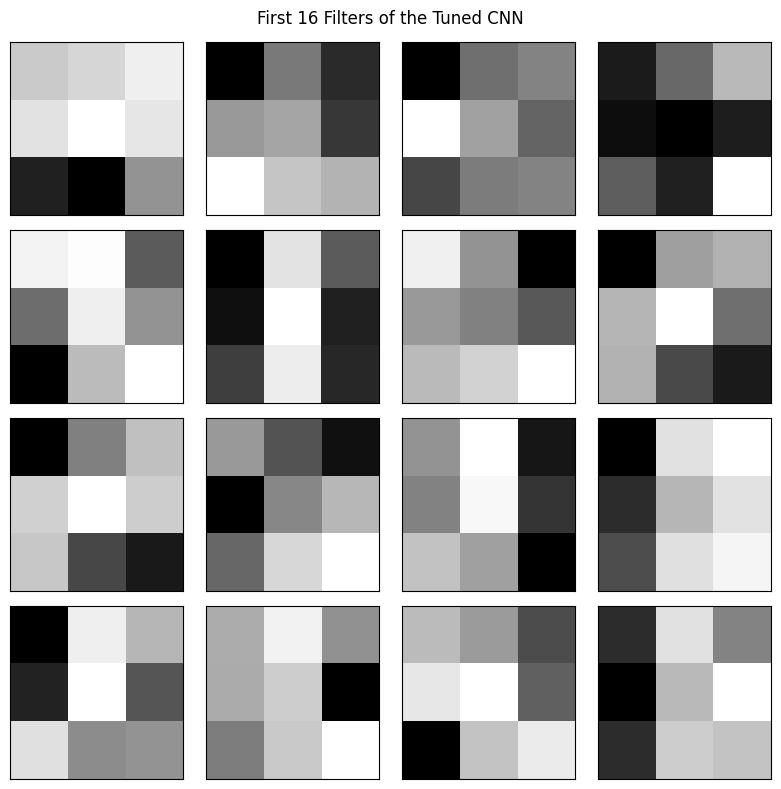

In [39]:
print("\nVisualizing Filters from the First Convolutional Layer...")
# Get the first convolutional layer
first_conv_layer = tuned_model.layers[0]
# Get the weights and biases
weights, biases = first_conv_layer.get_weights()

# Normalize filter values to 0-1 so we can visualize them
f_min, f_max = weights.min(), weights.max()
filters = (weights - f_min) / (f_max - f_min)

# Plot the first N filters
n_filters = 16
fig, axes = plt.subplots(4, 4, figsize=(8,8))
fig.suptitle('First 16 Filters of the Tuned CNN')

for i in range(n_filters):
    # Get the filter
    f = filters[:, :, :, i]
    # Get the subplot axes
    ax = axes.flatten()[i]
    # Plot the filter channel
    ax.imshow(f[:, :, 0], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()